In [1]:
import numpy as np
from scipy.stats import norm, poisson
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
p = [0.1, 0.41, 0, 0.334]
q = [0.11, 0.45, 0.12, 0.345]

In [3]:
def kl(p, q):
    result = np.sum(
        np.where(
            np.logical_and(
                p != 0, q != 0
            ),
            p * np.log(p /  q), 0
        )
    )
    return result

In [4]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

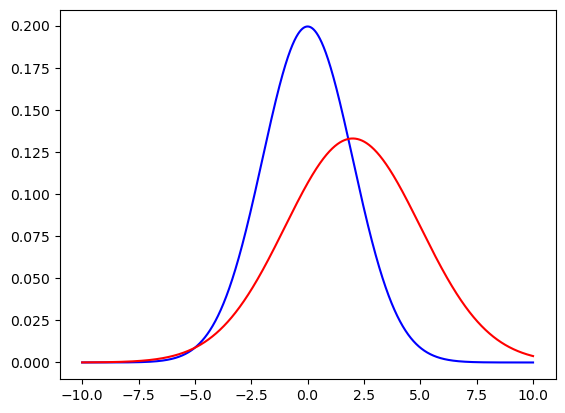

In [5]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [6]:
kl(p, q)

349.91348337868124

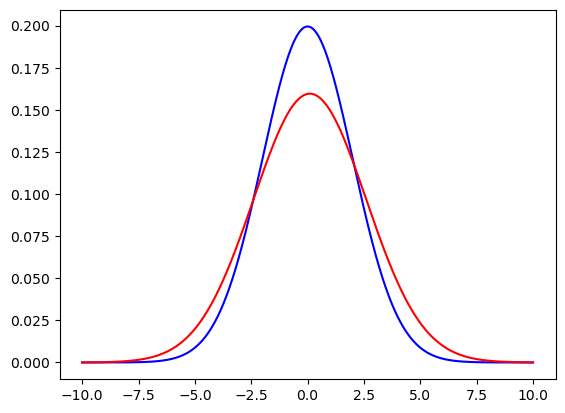

In [7]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [8]:
kl(p, q)

43.94620233653506

In [9]:
data = pd.read_csv("Data/weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

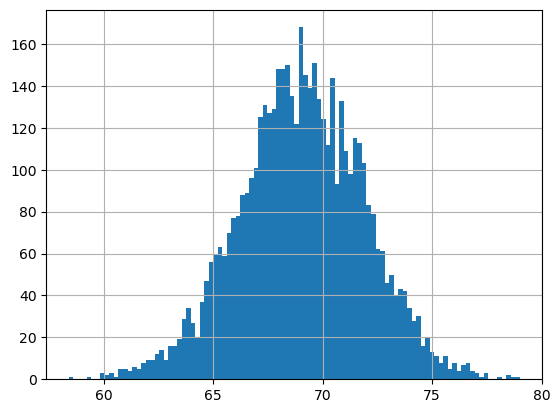

In [11]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [12]:
males.describe()['mean']

69.02634590621741

In [13]:
males.describe()['std']

2.863362228660647

In [14]:
count, division = np.histogram(males, bins=100)
print(count)
print(division)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [15]:
ideal = norm.rvs(
    size=len(males),
    loc=males.describe()['mean'],
    scale=males.describe()['std']
)
print(ideal)

[68.49279806 73.2269652  68.2143314  ... 71.45087463 66.58457919
 68.94538544]


In [16]:
icount, idivision = np.histogram(ideal, bins=100)
print(icount)
print(idivision)

[  1   1   1   1   4   1   1   3   4   4   1   4   7   4  10  10  14  16
  22  29  25  35  28  35  36  39  44  51  72  87  86  86  95  87 104 112
 106 133 123 117 146 136 152 150 158 149 144 142 169 148 125 131 118 117
 126 108 125  92 108 103  95  69  68  57  59  40  35  47  34  35  28  27
  27  18   7  12   9   6   9   7   2   2   3   3   5   1   1   1   2   3
   0   0   0   1   0   0   0   0   0   1]
[59.06012054 59.27583656 59.49155257 59.70726859 59.9229846  60.13870062
 60.35441663 60.57013265 60.78584866 61.00156468 61.21728069 61.43299671
 61.64871272 61.86442874 62.08014475 62.29586077 62.51157678 62.7272928
 62.94300881 63.15872483 63.37444084 63.59015686 63.80587287 64.02158889
 64.2373049  64.45302091 64.66873693 64.88445294 65.10016896 65.31588497
 65.53160099 65.747317   65.96303302 66.17874903 66.39446505 66.61018106
 66.82589708 67.04161309 67.25732911 67.47304512 67.68876114 67.90447715
 68.12019317 68.33590918 68.5516252  68.76734121 68.98305723 69.19877324
 69.414489

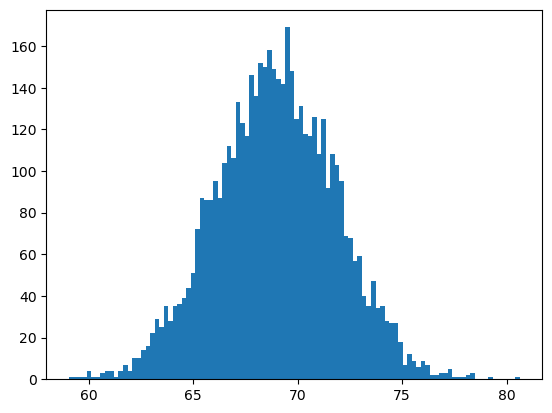

In [17]:
plt.hist(ideal, bins=100);

In [18]:
kl(count, icount)

/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: divide by zero encountered in divide
  p * np.log(p /  q), 0
/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: invalid value encountered in divide
  p * np.log(p /  q), 0
/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: divide by zero encountered in log
  p * np.log(p /  q), 0
/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: invalid value encountered in multiply
  p * np.log(p /  q), 0


558.2456006650914

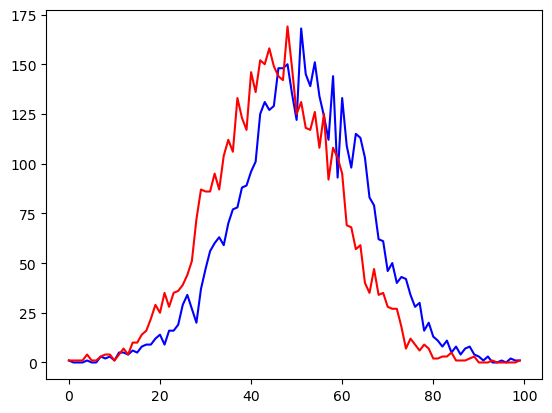

In [19]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [20]:
count = count / 5000
icount = icount / 5000

In [21]:
kl(count, icount)

/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: divide by zero encountered in divide
  p * np.log(p /  q), 0
/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: invalid value encountered in divide
  p * np.log(p /  q), 0
/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: divide by zero encountered in log
  p * np.log(p /  q), 0
/tmp/ipykernel_32002/2408804039.py:7: RuntimeWarning: invalid value encountered in multiply
  p * np.log(p /  q), 0


0.11164912013301827

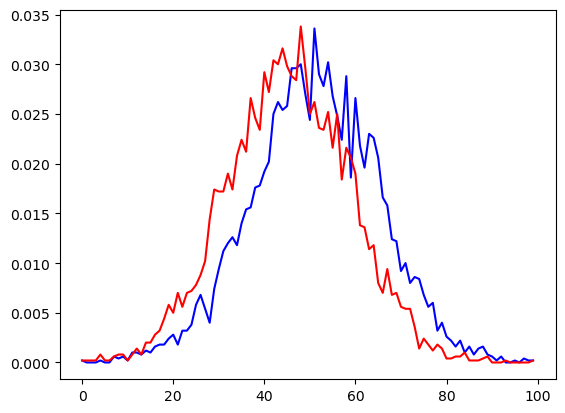

In [22]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')